In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [10]:
data = {
    'Review': [
        'I love this product!', 'Worst purchase ever.', 'Absolutely fantastic!',
        'I hate it.', 'Not bad at all.', 'Very disappointing.',
        'Really good experience.', 'Terrible quality.', 'Highly recommended!',
        'Will not buy again.', 'Amazing product quality.', 'Disgusting and broken item.',
        'Best in the market!', 'Don’t waste your money.', 'Exceeded expectations.',
        'Not worth it.', 'Loved the packaging!', 'Too bad to keep it.',
        'Would recommend this to everyone.', 'Awful product.',
        'I feel happy using it.', 'Very cheap and low quality.',
        'It changed my life!', 'Broken and useless.', 'Superb!',
        'Not useful at all.', 'Incredible performance.', 'Worst thing ever.',
        'Great value for money.', 'Horrible experience.'
    ],
    'Sentiment': [
        1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0
    ]
}
df = pd.DataFrame(data)
df['Review'] = df['Review'].str.lower()
df.head()



,Review,Sentiment
0,i love this product!,1
1,worst purchase ever.,0
2,absolutely fantastic!,1
3,i hate it.,0
4,not bad at all.,1


In [11]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Review'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)



In [12]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [13]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


✅ Accuracy: 0.625
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



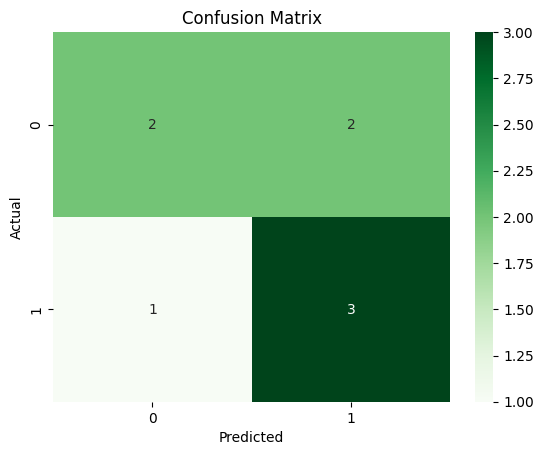

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


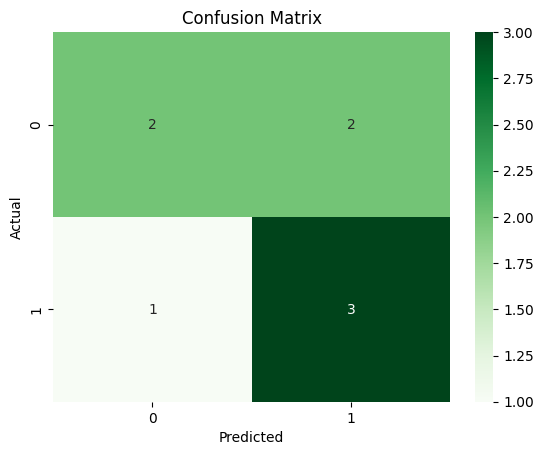

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
def predict_sentiment(text):
    text = text.lower()
    vector = tfidf.transform([text])
    result = model.predict(vector)[0]
    return "Positive 😊" if result == 1 else "Negative 😞"

# 🔍 Example tests:
print(predict_sentiment("I love the camera and sound quality."))
print(predict_sentiment("Terrible phone with battery issues."))


Positive 😊
Positive 😊


In [19]:
user_input = input("🔹 Enter your review: ")
print("🔍 Sentiment:", predict_sentiment(user_input))


🔹 Enter your review: i dont  prefer this kind of stuff
🔍 Sentiment: Positive 😊
